# Setup Dependencies for Notebook use

In [145]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests as rq
import random as rnd
import gmaps
import os
import json
import time

# Import API key
import config

# Configure gmaps
gkey = config.gkey
gmaps.configure(api_key=gkey)

# Data Extraction - Setting relative path | Importing csv files in directory | Reading in with Pandas

In [146]:
notebook_path = os.getcwd()
parent_dir = notebook_path[0:-4]

In [147]:
dataset_filelist = ["1_county_level_confirmed_cases.csv","2_cases_and_deaths_by_county_timeseries.csv","weekly-claims-by-county-twc.csv","texas_county_med_income.csv"]
for csv in dataset_filelist:   
    for root, dirs, files in os.walk(parent_dir):
        if csv in files:
            if csv == dataset_filelist[0]:
                covid_dataset1 = (os.path.join(root, csv))
            elif csv == dataset_filelist[1]:
               covid_dataset2 =  (os.path.join(root, csv))
            elif csv == dataset_filelist[2]:
               unemployment_dataset =  (os.path.join(root, csv))
            else:
                texas_median_income = (os.path.join(root, csv))

In [148]:
ConfirmedByCounty_Covid = pd.read_csv('https://query.data.world/s/tmtcsyi5cadisfgsziloo4c7sesaon') # Dataset covid_dataset1 can be used as a subsuite for live data grab. limited by date of csv download
CaseDeathsBy_County_timeseries = pd.read_csv('https://query.data.world/s/ipaqguramdyfp27ppx72n3sgtkj6xu', parse_dates=['date']) # Dataset covid_dataset2 can be used as a subsuite for live data grab. limited by date of csv download
unemployment_dataset = pd.read_csv(unemployment_dataset)
texas_median_income = pd.read_csv(texas_median_income)

#  Initial Data Review - Take a look at data in raw form after loading with Pandas

In [149]:
# Covid-19 cases by county as of date in last_update column - Overall Confirms and Deaths
ConfirmedByCounty_Covid.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-11-20 02:26:42 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,2554,4626.81,39,70.65
1,2020-11-20 02:26:42 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,7933,3811.98,84,40.36
2,2020-11-20 02:26:42 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,1145,4441.08,10,38.79
3,2020-11-20 02:26:42 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,1011,4487.95,18,79.90
4,2020-11-20 02:26:42 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,2683,4654.35,35,60.72


In [150]:
# Covid-19 cases by county timeseries cumulative outlook, start of pandemic to as of pull date
CaseDeathsBy_County_timeseries.head()

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
0,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-22,18181.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-23,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-24,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-25,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-26,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [151]:
# Texas county unemployment data timeseries - Data starts in march
unemployment_dataset.head()

,County,11/7/2020,10/31/2020,10/24/2020,10/17/2020,10/10/2020,10/3/2020,9/26/2020,9/19/2020,9/12/2020,...,5/9/2020,5/2/2020,4/25/2020,4/18/2020,4/11/2020,4/4/2020,3/28/2020,3/21/2020,3/14/2020,3/7/2020
0,Anderson,51.0,42.0,79.0,54.0,63.0,64.0,64.0,61.0,66.0,...,153.0,181.0,176.0,183.0,205.0,252.0,180.0,101.0,18.0,20.0
1,Andrews,12.0,17.0,17.0,17.0,30.0,25.0,21.0,18.0,32.0,...,96.0,117.0,133.0,143.0,165.0,143.0,95.0,50.0,16.0,1.0
2,Angelina,83.0,77.0,89.0,80.0,98.0,103.0,100.0,119.0,107.0,...,273.0,463.0,388.0,449.0,495.0,689.0,452.0,227.0,37.0,37.0
3,Aransas,20.0,32.0,22.0,40.0,18.0,26.0,35.0,25.0,31.0,...,92.0,154.0,109.0,160.0,155.0,230.0,217.0,70.0,10.0,9.0
4,Archer,5.0,3.0,6.0,5.0,10.0,6.0,5.0,4.0,5.0,...,20.0,32.0,24.0,41.0,34.0,58.0,42.0,20.0,1.0,2.0


In [152]:
# Data set of median household income by Texas counties - Data source: U.S. Census Bureau. Small Area Income & Poverty Estimates. (2019)
texas_median_income.head()

,County,Median Household Income
0,Anderson,"$45,969"
1,Andrews,"$84,946"
2,Angelina,"$46,653"
3,Aransas,"$46,912"
4,Archer,"$61,190"


# Data Cleansing - Removing unused data, corercting data types, getting rid of Incorrect or invalid data, etc...

## Let's clean Texas Median Income

In [153]:
texas_median_income['Median Household Income'] = texas_median_income['Median Household Income'].str.replace('$','').str.replace(',','').astype(float)

In [154]:
# Display cleaned DataFrame
texas_median_income.head()

,County,Median Household Income
0,Anderson,45969.0
1,Andrews,84946.0
2,Angelina,46653.0
3,Aransas,46912.0
4,Archer,61190.0


In [155]:
# Get preliminary statistical outlook 
texas_median_income.describe()

,Median Household Income
count,254.000000
mean,51302.248031
std,12220.163942
min,30076.000000
25%,43253.750000
50%,48541.500000
75%,56199.250000
max,102858.000000


## Let's clean our first Covid-19 dataset. These are up-to-date cases with confirmed cases and deaths as of the last_update column.

In [156]:
Texas_ConfirmedByCounty_Covid = ConfirmedByCounty_Covid.loc[ConfirmedByCounty_Covid['state'] == 'Texas'].dropna(subset=['lat','lon'])
Texas_ConfirmedByCounty_Covid = Texas_ConfirmedByCounty_Covid.drop(columns=["location_type","state","county_name_long","fips_code"])

In [157]:
# Display cleaned DataFrame
Texas_ConfirmedByCounty_Covid.head()

,last_update,county_name,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
2599,2020-11-20 02:26:42 UTC,Anderson,31.815347,-95.653548,Micropolitan,57863.0,3101,5359.21,46,79.50
2600,2020-11-20 02:26:42 UTC,Andrews,32.304686,-102.637655,Micropolitan,17818.0,940,5275.56,13,72.96
2601,2020-11-20 02:26:42 UTC,Angelina,31.254573,-94.609015,Micropolitan,87607.0,2497,2850.23,97,110.72
2602,2020-11-20 02:26:42 UTC,Aransas,28.105562,-96.999505,Medium metro,24763.0,376,1518.39,18,72.69
2603,2020-11-20 02:26:42 UTC,Archer,33.615700,-98.687546,Small metro,8789.0,220,2503.13,2,22.76


In [158]:
# Get preliminary statistical outlook 
Texas_ConfirmedByCounty_Covid.describe()

,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
count,254.000000,254.000000,2.540000e+02,254.000000,254.000000,254.000000,254.000000
mean,31.660643,-98.653069,1.097842e+05,4350.429134,3506.030512,80.964567,92.600787
std,2.173436,2.670036,3.963104e+05,16299.703951,1858.922063,279.074506,65.868153
min,26.145242,-106.236327,1.020000e+02,1.000000,438.600000,0.000000,0.000000
25%,30.126978,-100.778688,7.099750e+03,196.250000,2241.417500,6.000000,49.527500
50%,31.783209,-98.543035,1.858450e+04,577.000000,2971.030000,15.000000,75.610000
75%,33.177285,-96.573857,4.987325e+04,1664.250000,4467.105000,46.750000,121.020000
max,36.278291,-93.744088,4.602523e+06,178811.000000,11181.840000,2943.000000,348.190000


## Next we'll clean-up our Covid-19 data timeseries that focuses on deaths and cases that are calculated cumulatively over time 

In [159]:
columns_todrop = []
Texas_CaseDeathsBy_County_timeseries = CaseDeathsBy_County_timeseries.loc[(CaseDeathsBy_County_timeseries['state'] == 'Texas') & (CaseDeathsBy_County_timeseries['location_name'] != 'Unassigned') & (CaseDeathsBy_County_timeseries['location_name'] != 'Out of TX')]
Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.loc[Texas_CaseDeathsBy_County_timeseries['date'] >= '2020-03-01']
for column in Texas_CaseDeathsBy_County_timeseries.columns:
    if column.startswith('new'):
        columns_todrop.append(column)
for drop in columns_todrop:
    Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.drop(columns=drop)

# Drop all other unused columns

Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.drop(columns=["uid","location_type","state"]).set_index('date')

In [160]:
# Display cleaned DataFrame
Texas_CaseDeathsBy_County_timeseries.head()

,fips_code,location_name,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
date,,,,,,,
2020-03-01,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-02,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-03,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-04,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-05,48001.0,Anderson,57863.0,0,0.0,0,0.0


In [161]:
# Get preliminary statistical outlook 
Texas_CaseDeathsBy_County_timeseries.describe()

,fips_code,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
count,66802.000000,6.680200e+04,66802.000000,66802.000000,66802.000000,66802.000000
mean,48254.000000,1.097842e+05,1449.341172,1055.936214,28.501213,27.353493
std,146.646929,3.955325e+05,7831.583236,1382.727070,150.623510,45.246288
min,48001.000000,1.020000e+02,0.000000,0.000000,0.000000,0.000000
25%,48127.000000,7.092000e+03,4.000000,30.392500,0.000000,0.000000
50%,48254.000000,1.858450e+04,64.000000,438.210000,1.000000,4.960000
75%,48381.000000,4.998700e+04,418.000000,1651.810000,10.000000,38.750000
max,48507.000000,4.602523e+06,177466.000000,10932.740000,2928.000000,348.190000


## Create a subset of Covid-19 Timeseries that only has results for End of Month rows

In [162]:
endofmonth_Covid_timeseries = Texas_CaseDeathsBy_County_timeseries[(Texas_CaseDeathsBy_County_timeseries.index + pd.Timedelta(days=1)).day == 1]
current_month_Covid_timeseries = Texas_CaseDeathsBy_County_timeseries.loc['2020-11-11']
endofmonth_Covid_timeseries = endofmonth_Covid_timeseries.append(current_month_Covid_timeseries)

In [163]:
# Display new DataFrame showing filtered resultset
endofmonth_Covid_timeseries.head()

,fips_code,location_name,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
date,,,,,,,
2020-03-31,48001.0,Anderson,57863.0,1,1.73,0,0.00
2020-04-30,48001.0,Anderson,57863.0,29,50.12,0,0.00
2020-05-31,48001.0,Anderson,57863.0,72,124.43,0,0.00
2020-06-30,48001.0,Anderson,57863.0,1032,1783.52,2,3.46
2020-07-31,48001.0,Anderson,57863.0,2196,3795.17,8,13.83


### Cleaning up unemployment dataset and manipulating data as needed

In [164]:
unemployment_claims = unemployment_dataset.copy()
unemployment_claims = unemployment_claims.transpose()
unemployment_claims = unemployment_claims.fillna(0)

unemployment_claims.columns = [''] * len(unemployment_claims.columns)
unemployment_header = unemployment_claims.iloc[0]
unemployment_claims = unemployment_claims[1:]
unemployment_claims.columns = unemployment_header
unemployment_claims.index.names = ['Date']
unemployment_claims.columns.names = ['']

unemployment_claims.index = pd.to_datetime(unemployment_claims.index)

In [165]:
unemployment_claims.head()

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,...,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,51,12,83,20,5,0,57,29,12,18,...,26,455,32,11,52,39,8,12,19,21
2020-10-31,42,17,77,32,3,1,46,28,3,23,...,24,422,28,7,74,31,14,16,20,11
2020-10-24,79,17,89,22,6,0,36,23,1,13,...,51,409,34,8,65,33,8,17,27,18
2020-10-17,54,17,80,40,5,1,35,26,4,24,...,43,434,30,15,45,26,6,17,27,12
2020-10-10,63,30,98,18,10,2,40,32,3,11,...,24,484,41,11,57,38,6,19,22,16


In [166]:
unemployment_claims.describe()

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,...,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
count,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
unique,34.0,32.0,35.0,32.0,22.0,8.0,34.0,34.0,12.0,29.0,...,31.0,35.0,33.0,26.0,34.0,34.0,25.0,29.0,29.0,24.0
top,64.0,17.0,37.0,63.0,5.0,2.0,96.0,29.0,3.0,18.0,...,29.0,678.0,41.0,8.0,59.0,89.0,13.0,18.0,7.0,21.0
freq,2.0,3.0,2.0,2.0,5.0,8.0,2.0,2.0,8.0,3.0,...,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0


# Data Wrangling - Recalculating and storing needed values | Further Reshaping and transformation needed for secondary subsets | Merges

In [167]:
# Using the endofmonth_Covid_timeseries DF Calculate Distinct EOM numbers for each month outside of the cumulative numbers
date_list = endofmonth_Covid_timeseries.index.unique()
cumulative_numbers = []
cumulative_numbers.append(endofmonth_Covid_timeseries.loc['2020-03-31']['cumulative_cases'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers.append((endofmonth_Covid_timeseries.loc[date_list[d+1]]['cumulative_cases'].sum()) - (endofmonth_Covid_timeseries.loc[date_list[d]]['cumulative_cases'].sum()))
print(cumulative_numbers)

[3809, 24918, 35925, 98408, 275233, 194446, 140280, 159242, 90075]


## HUD - Median Household Incomes(Family of 4) - Incomes over 57K

In [168]:
texas_income_above57k = texas_median_income.loc[(texas_median_income['Median Household Income'] > 57000)]
texas_income_above57k.head()

,County,Median Household Income
1,Andrews,84946.0
4,Archer,61190.0
5,Armstrong,57210.0
7,Austin,59942.0
10,Bastrop,61883.0


## Incomes that qualify as low imcome per HUD data. Less than or equal to 57K but greater than 36K

In [169]:
texas_low_income = texas_median_income.loc[(texas_median_income['Median Household Income'] <= 57000) & (texas_median_income['Median Household Income'] > 36000)]
texas_low_income.head()

,County,Median Household Income
0,Anderson,45969.0
2,Angelina,46653.0
3,Aransas,46912.0
6,Atascosa,50594.0
8,Bailey,45051.0


## Incomes that qualify as very low imcome per HUD data. Less than or equal to 36K but greater than 26K

In [170]:
texas_verylow_income = texas_median_income.loc[(texas_median_income['Median Household Income'] <= 36000) & (texas_median_income['Median Household Income'] > 26000)]
texas_verylow_income.head()

,County,Median Household Income
23,Brooks,30116.0
65,Duval,35156.0
95,Hall,32597.0
161,Maverick,35594.0
163,Menard,35881.0


## Some more transforming and Wrangling of unemployment data

In [171]:
# claims_data_merged, reshaped, and some clean-up
claims_data_merged_above57k = unemployment_dataset.merge(texas_income_above57k, left_on='County', right_on='County')
claims_data_merged_low = unemployment_dataset.merge(texas_low_income, left_on='County', right_on='County')
claims_data_merged_very_low = unemployment_dataset.merge(texas_verylow_income, left_on='County', right_on='County')

claims_data_merged_above57k = claims_data_merged_above57k.drop(columns=['Median Household Income'])
claims_data_merged_low = claims_data_merged_low.drop(columns=['Median Household Income'])
claims_data_merged_very_low = claims_data_merged_very_low.drop(columns=['Median Household Income'])

claims_data_merged_above57k = claims_data_merged_above57k.transpose()
claims_data_merged_above57k = claims_data_merged_above57k.fillna(0)

claims_data_merged_low = claims_data_merged_low.transpose()
claims_data_merged_low = claims_data_merged_low.fillna(0)

claims_data_merged_very_low = claims_data_merged_very_low.transpose()
claims_data_merged_very_low = claims_data_merged_very_low.fillna(0)

In [172]:
# Reshape both DFs bring the counties up to the column level and re-indexing 
claims_data_merged_above57k.columns = [''] * len(claims_data_merged_above57k.columns)
claims_data_merged_header = claims_data_merged_above57k.iloc[0]
claims_data_merged_above57k = claims_data_merged_above57k[1:]
claims_data_merged_above57k.columns = claims_data_merged_header
claims_data_merged_above57k.index.names = ['Date']
claims_data_merged_above57k.columns.names = ['']

claims_data_merged_low.columns = [''] * len(claims_data_merged_low.columns)
claims_data_merged_header = claims_data_merged_low.iloc[0]
claims_data_merged_low = claims_data_merged_low[1:]
claims_data_merged_low.columns = claims_data_merged_header
claims_data_merged_low.index.names = ['Date']
claims_data_merged_low.columns.names = ['']

claims_data_merged_very_low.columns = [''] * len(claims_data_merged_very_low.columns)
claims_data_merged_very_low_header = claims_data_merged_very_low.iloc[0]
claims_data_merged_very_low = claims_data_merged_very_low[1:]
claims_data_merged_very_low.columns = claims_data_merged_very_low_header
claims_data_merged_very_low.index.names = ['Date']
claims_data_merged_very_low.columns.names = ['']

In [173]:
# Transform index into a datetime format for later manipulation
claims_data_merged_above57k.index = pd.to_datetime(claims_data_merged_above57k.index)
claims_data_merged_low.index = pd.to_datetime(claims_data_merged_low.index)
claims_data_merged_very_low.index = pd.to_datetime(claims_data_merged_very_low.index)

In [174]:
claims_data_merged_above57k.head()

,Andrews,Archer,Armstrong,Austin,Bastrop,Blanco,Borden,Brazoria,Carson,Chambers,...,Sherman,Somervell,Sterling,Tarrant,Travis,Waller,Williamson,Wilson,Wise,Yoakum
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,12,5,0,29,54,2,0,455,0,76,...,2,8,0,2279,1026,40,455,32,52,8
2020-10-31,17,3,1,28,75,4,0,429,2,73,...,2,4,2,2327,997,55,422,28,74,14
2020-10-24,17,6,0,23,81,2,0,456,2,59,...,1,5,3,2342,1055,49,409,34,65,8
2020-10-17,17,5,1,26,77,6,0,435,4,63,...,2,5,3,2296,1208,47,434,30,45,6
2020-10-10,30,10,2,32,70,7,0,531,7,71,...,2,10,2,2923,1234,64,484,41,57,6


In [175]:
# Display merged claims data for low income category
claims_data_merged_low.head()

,Anderson,Angelina,Aransas,Atascosa,Bailey,Bandera,Baylor,Bee,Bell,Bexar,...,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Winkler,Wood,Young
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,51,83,20,57,12,18,2,34,428,1952,...,24,33,241,36,9,159,20,11,39,12
2020-10-31,42,77,32,46,3,23,5,20,408,2002,...,14,30,248,36,3,151,11,7,31,16
2020-10-24,79,89,22,36,1,13,2,24,359,1842,...,17,24,246,49,4,159,18,8,33,17
2020-10-17,54,80,40,35,4,24,2,19,364,1766,...,23,34,248,41,9,156,22,15,26,17
2020-10-10,63,98,18,40,3,11,3,41,436,2319,...,19,37,318,38,10,176,24,11,38,19


In [176]:
# Display merged claims data for very low income category
claims_data_merged_very_low.head()

,Brooks,Duval,Hall,Maverick,Menard,Starr,Willacy,Zapata,Zavala
Date,,,,,,,,,
2020-11-07,7,21,2,138,2,178,26,19,21
2020-10-31,9,10,2,241,1,124,24,20,11
2020-10-24,8,16,1,111,2,152,51,27,18
2020-10-17,13,9,4,100,0,143,43,27,12
2020-10-10,12,19,3,99,1,139,24,22,16


In [177]:
endofmonth_Covid_timeseries_lowincome = endofmonth_Covid_timeseries.rename(columns={"location_name":"County"})
endofmonth_Covid_timeseries_lowincome = endofmonth_Covid_timeseries_lowincome.reset_index()
combined_low_income_covidcases = pd.merge(endofmonth_Covid_timeseries_lowincome, texas_low_income, on='County').set_index('date')
combined_low_income_covidcases = combined_low_income_covidcases.dropna(how='any')
combined_low_income_covidcases

,fips_code,County,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,Median Household Income
date,,,,,,,,
2020-03-31,48001.0,Anderson,57863.0,1,1.73,0,0.00,45969.0
2020-04-30,48001.0,Anderson,57863.0,29,50.12,0,0.00,45969.0
2020-05-31,48001.0,Anderson,57863.0,72,124.43,0,0.00,45969.0
2020-06-30,48001.0,Anderson,57863.0,1032,1783.52,2,3.46,45969.0
2020-07-31,48001.0,Anderson,57863.0,2196,3795.17,8,13.83,45969.0
...,...,...,...,...,...,...,...,...
2020-07-31,48503.0,Young,18114.0,133,734.24,3,16.56,49301.0
2020-08-31,48503.0,Young,18114.0,244,1347.02,6,33.12,49301.0
2020-09-30,48503.0,Young,18114.0,332,1832.84,6,33.12,49301.0


In [178]:
endofmonth_Covid_timeseries_verylowincome = endofmonth_Covid_timeseries.rename(columns={"location_name":"County"})
endofmonth_Covid_timeseries_verylowincome = endofmonth_Covid_timeseries_verylowincome.reset_index()
combined_very_low_income_covidcases = pd.merge(endofmonth_Covid_timeseries_verylowincome, texas_verylow_income, on='County').set_index('date')
combined_very_low_income_covidcases = combined_very_low_income_covidcases.dropna(how='any')
combined_very_low_income_covidcases.head()

,fips_code,County,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,Median Household Income
date,,,,,,,,
2020-03-31,48047.0,Brooks,7180.0,0,0.00,0,0.00,30116.0
2020-04-30,48047.0,Brooks,7180.0,1,13.93,0,0.00,30116.0
2020-05-31,48047.0,Brooks,7180.0,1,13.93,0,0.00,30116.0
2020-06-30,48047.0,Brooks,7180.0,3,41.78,0,0.00,30116.0
2020-07-31,48047.0,Brooks,7180.0,84,1169.92,1,13.93,30116.0


# Analysis - DataFrame calculations and Graph plotting

### Setting up claims data for calculations and plotting using resampling and matplotlib

In [179]:
unemployment_claims_monthly = unemployment_claims.resample('M').sum()
unemployment_claims_monthly_by_county = unemployment_claims_monthly.sum(axis=0) 

claims_monthly_totals = unemployment_claims_monthly.sum(axis=1)
total_claims_per_month_df = pd.DataFrame()

In [180]:
above_lowincome_claims_monthly = claims_data_merged_above57k.resample('M').sum()
low_income_claims_monthly = claims_data_merged_low.resample('M').sum()
very_low_income_claims_monthly = claims_data_merged_very_low.resample('M').sum()

In [181]:
low_income_claims_monthly_sum  = low_income_claims_monthly.sum(axis=1) 
above_lowincome_claims_monthly_sum = above_lowincome_claims_monthly.sum(axis=1)
very_low_income_claims_monthly_sum  = very_low_income_claims_monthly.sum(axis=1) 

total_claims_per_month_df['Claims per Month Above Low Income'] = above_lowincome_claims_monthly_sum
total_claims_per_month_df['Claims per Month Low Income'] = low_income_claims_monthly_sum
total_claims_per_month_df['Claims per Month Very Low Income'] = very_low_income_claims_monthly_sum

total_claims_per_month_df.head() #Display total claims data

,Claims per Month Above Low Income,Claims per Month Low Income,Claims per Month Very Low Income
Date,,,
2020-03-31,305903.0,139761.0,2175.0
2020-04-30,564877.0,273291.0,4652.0
2020-05-31,386642.0,198815.0,5546.0
2020-06-30,204972.0,110807.0,3158.0
2020-07-31,201863.0,118853.0,2933.0


In [182]:
date = total_claims_per_month_df.index.month_name().str.slice(stop=3)

In [183]:
# Covid cases to be used for line plot
cumulative_numbers_df = pd.DataFrame(cumulative_numbers,index=date)
cumulative_numbers_df.columns = ['Numbers']
cumulative_numbers_df.head()

,Numbers
Date,
Mar,3809
Apr,24918
May,35925
Jun,98408
Jul,275233


### Plot Chart for Texas claims by county and Covid-19 cases

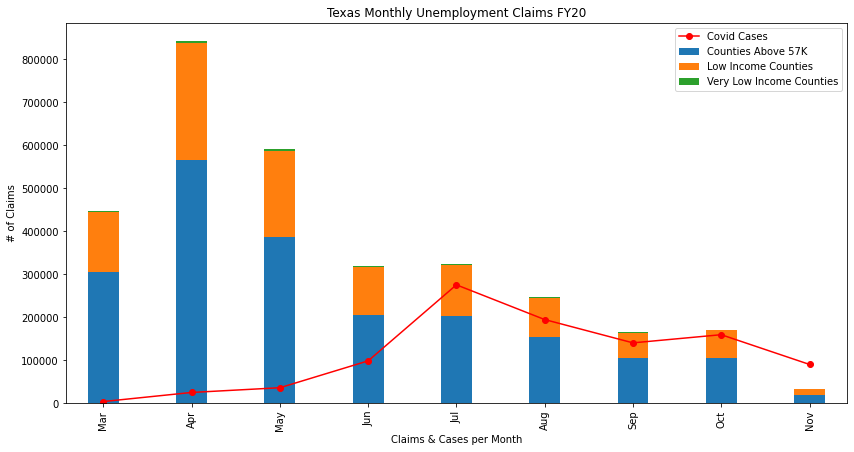

In [184]:
ax1 = cumulative_numbers_df.plot(kind='line',color='red', marker='o')
ax2 = total_claims_per_month_df.plot(kind='bar', stacked=True, width=.35, figsize=(14,7),ax=ax1)

ax2.set_title('Texas Monthly Unemployment Claims FY20')
ax2.legend(['Covid Cases','Counties Above 57K', 'Low Income Counties','Very Low Income Counties'])
ax2.set_xlabel('Claims & Cases per Month')
ax2.set_ylabel('# of Claims')
ax2 = ax2.set_xticklabels(date)


In [185]:
## Jazlyn

In [186]:
date_list = combined_low_income_covidcases.index.unique()
cumulative_numbers_cases_lowIncome = []
cumulative_numbers_cases_lowIncome.append(combined_low_income_covidcases.loc['2020-03-31']['cumulative_cases_per_100_000'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers_cases_lowIncome.append((combined_low_income_covidcases.loc[date_list[d+1]]['cumulative_cases_per_100_000'].sum()) - (combined_low_income_covidcases.loc[date_list[d]]['cumulative_cases'].sum()))
cumulative_numbers_cases_lowIncome_df = pd.DataFrame(cumulative_numbers_cases_lowIncome)
print(cumulative_numbers_cases_lowIncome)

[1181.54, 12476.490000000002, 27601.08, 57755.899999999994, 178914.05, 152030.15999999997, 159288.04999999993, 223259.21999999997, 212538.74]


In [187]:
date_list = combined_very_low_income_covidcases.index.unique()
cumulative_numbers_cases_verylowIncome = []
cumulative_numbers_cases_verylowIncome.append(combined_very_low_income_covidcases.loc['2020-03-31']['cumulative_cases_per_100_000'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers_cases_verylowIncome.append((combined_very_low_income_covidcases.loc[date_list[d+1]]['cumulative_cases_per_100_000'].sum()) - (combined_very_low_income_covidcases.loc[date_list[d]]['cumulative_cases'].sum()))
cumulative_numbers_cases_verylowIncome_df = pd.DataFrame(cumulative_numbers_cases_verylowIncome)
print(cumulative_numbers_cases_verylowIncome)

[14.05, 198.75, 544.6299999999999, 3238.06, 13710.779999999999, 19811.14, 25450.550000000003, 29750.480000000003, 30858.370000000003]


In [188]:
chart_bar_df = pd.DataFrame({'Low Income':cumulative_numbers_cases_lowIncome,'Very Low Income':cumulative_numbers_cases_verylowIncome}, index=date)

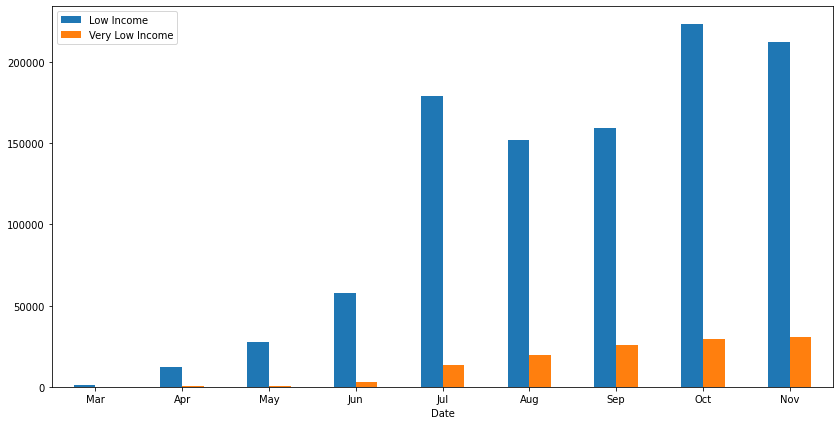

In [189]:
ax.set_ylabel('Number of Cumulative COVID-19 cases per 100,000')
ax.set_xlabel('Months in 2020')
ax.set_title('COVID-19 in Very Low vs Low Income')
ax = chart_bar_df.plot.bar(rot=0,figsize=(14,7))
fig.tight_layout()

In [190]:
urbanization_groupby = Texas_ConfirmedByCounty_Covid.groupby('NCHS_urbanization')
urbanization_groupby['confirmed'].sum().head()

NCHS_urbanization
Large central metro    509441
Large fringe metro     146057
Medium metro           271379
Micropolitan            67706
Non-core                45283
Name: confirmed, dtype: int64

In [191]:
urban_index = urbanization_groupby['confirmed'].sum().index

In [199]:
data = list(zip(urbanization_groupby['confirmed'].sum(),urbanization_groupby['deaths'].sum()))
new_df = pd.DataFrame(data, columns=['confirmed_cases','confirmed_deaths'],index=urban_index)
new_df = new_df.reset_index()
new_df = new_df.transpose()

In [200]:
new_df

,0,1,2,3,4,5
NCHS_urbanization,Large central metro,Large fringe metro,Medium metro,Micropolitan,Non-core,Small metro
confirmed_cases,509441,146057,271379,67706,45283,65143
confirmed_deaths,7507,2347,6081,2017,1306,1307


In [201]:
new_df.columns = [''] * len(new_df.columns)
header = new_df.iloc[0]
new_df = new_df[1:]
new_df.columns = header
new_df.index.names = ['Date']
new_df.columns.names = ['']

In [204]:
new_df

,Large central metro,Large fringe metro,Medium metro,Micropolitan,Non-core,Small metro
Date,,,,,,
confirmed_cases,509441,146057,271379,67706,45283,65143
confirmed_deaths,7507,2347,6081,2017,1306,1307


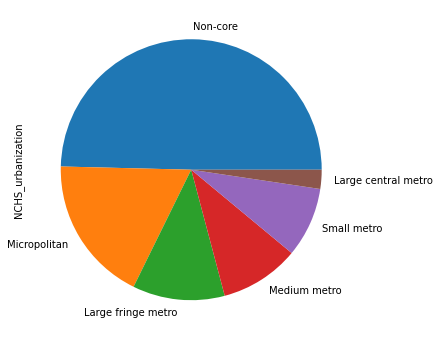

In [194]:
Texas_ConfirmedByCounty_Covid['NCHS_urbanization'].value_counts().plot(kind='pie', figsize=(6,6))
plt.show()

# API Call and Display of Heat Map showing "Confirmed" cases hot zones in Texas 

In [195]:
locations = Texas_ConfirmedByCounty_Covid[['lat','lon']]
confirmed = Texas_ConfirmedByCounty_Covid['confirmed']

In [196]:
zero_coor = (31.81,-95.65)
figure_layout = {'width': '1050px', 'margin': '0 auto 0 auto'}
# Plot Heatmap
fig = gmaps.figure(center=zero_coor,zoom_level=5.5,layout=figure_layout,map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=confirmed,
                                 dissipating=False, max_intensity=.5,
                                 point_radius=.5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px', margin='0 auto 0 auto', width='1050px'))

In [197]:
%reset

Nothing done.
